<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [147]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df_std = df.iloc[6500000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
6500000,2.0,11330521.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,202001,1,40000000.0,1,82000.0,3831791.31,PEDRAZA,75,5.155400e+05
6500001,2.0,12562229.29,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,B,M,...,3,201904,1,40000000.0,4,0.0,3831791.31,PEDRAZA,74,3.327700e+05
6500002,2.0,11555331.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,201909,1,40000000.0,9,223000.0,3831791.31,PEDRAZA,74,5.994400e+05
6500003,2.0,9371320.00,3622610.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,M,...,12,202004,1,19500000.0,4,5948000.0,0.00,PEDRAZA,42,4.600000e+03
6500004,2.0,6519869.00,2941320.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,C,M,...,10,201911,0,0.0,11,27617000.0,0.00,PEDRAZA,41,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.00,PUERRES,47,7.431714e+05
9527189,3.0,26913722.00,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.00,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.00,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.00,MURILLO,47,7.853290e+05
9527191,2.0,14481371.00,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.00,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [59]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [60]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    3027193
dtype: int64

## Best Variables

In [62]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf']

In [63]:
top_PCA_Variables = ['categoria',
                     'ingreso_final',
                     'mediana_nom3',
                     'ocupacion_tag_gasto_familiar',
                     'cartera_castigada',
                     'ind_mora_vigente',
                     'rep_calif_cred_tag_gasto_familiar',
                     'genero_tag',
                     'estado_civil_tag_gasto_familiar',
                     'nivel_academico_tag_gasto_familiar',
                     'profesion_tag_gasto_familiar',
                     'ctas_activas',
                     'ult_actual',
                     'tiene_cred_hipo_2',
                     'tiene_cred_hipo_1',
                     'cant_oblig_tot_sf',
                     'gasto_familiar']

In [64]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,ult_actual,tiene_cred_hipo_2,tiene_cred_hipo_1,cant_oblig_tot_sf,gasto_familiar
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.155400e+05
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,44,1,20190112,0,0,3,3.327700e+05
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.994400e+05
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,55,1,20200119,0,0,12,4.600000e+03
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,55,1,20190308,0,0,10,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,44,1,20201010,1,1,2,7.431714e+05
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,47,2,20201003,1,1,12,8.502165e+05
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,46,1,20200616,1,1,17,7.853290e+05
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,64,1,20200423,1,1,18,1.029045e+06


conditions = [
    (df_onehot['gasto_familiar'] < 0),
    (df_onehot['gasto_familiar'] >= 0)
]
values = [-1,1]
df_onehot['Negative'] = np.select(conditions, values)
df_onehot['Negative'].value_counts()

df_onehot['gasto_familiar'] = power_transform(np.array(df_onehot['gasto_familiar']).reshape(1, -1),method='yeo-johnson')
df_onehot['gasto_familiar'].describe()

In [65]:
minimo = np.min(df_onehot['gasto_familiar'])-1
df_onehot['gasto_familiar'] = stats.boxcox(df['gasto_familiar']-minimo)[0])
df_onehot['gasto_familiar'].describe()

count    3.027193e+06
mean     1.612036e+01
std      9.461812e-02
min      0.000000e+00
25%      1.606769e+01
50%      1.609782e+01
75%      1.613294e+01
max      2.018574e+01
Name: gasto_familiar, dtype: float64

Text(0, 0.5, 'count')

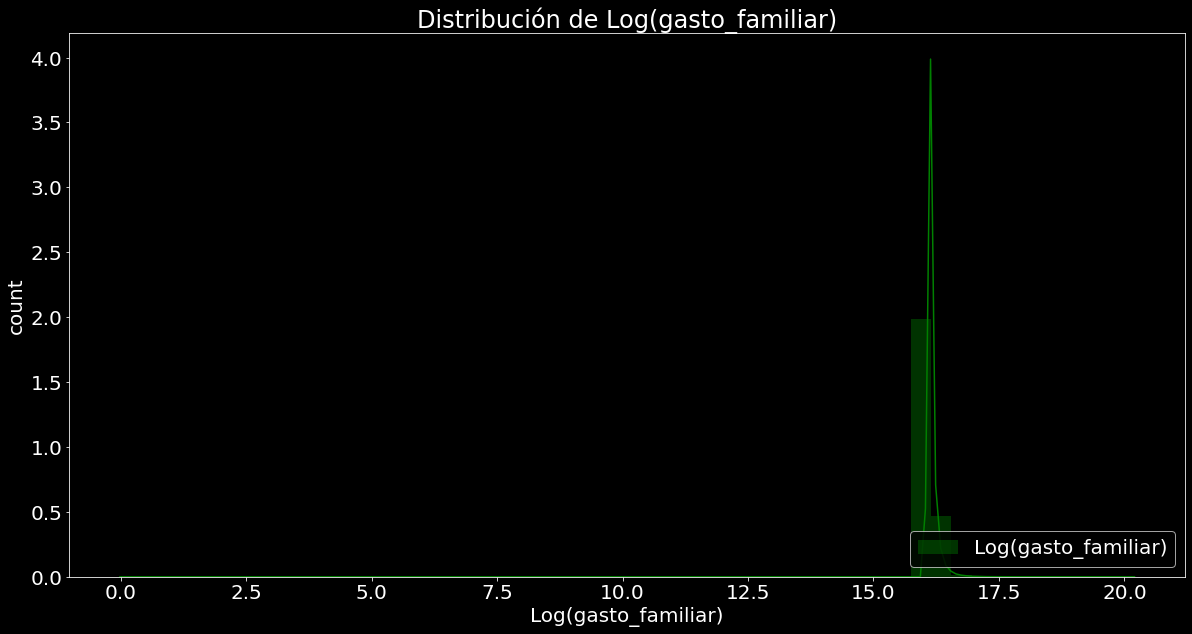

In [66]:
plt.rcParams.update({'font.size': 20})
plt.style.use("dark_background")
plt.figure(figsize=(20,10*1))
plt.title("Distribución de gasto_familiar") 
sns.distplot(df_onehot['gasto_familiar'],
             color='y', label='gasto_familiar Lamda '+stats.boxcox(df['gasto_familiar']-minimo)[1])
plt.legend(loc='best')
plt.xlabel('Gasto_familiar')

#plt.tight_layout()
plt.ylabel("count")

## Normalization

In [67]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,3027193.0,0.30,0.14,0.0,0.20,0.20,0.40,1.0
1,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,3027193.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,3027193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,3027193.0,0.61,0.36,0.0,0.29,0.57,1.00,1.0
7,3027193.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
8,3027193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,3027193.0,0.38,0.24,0.0,0.40,0.40,0.40,1.0


In [68]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [69]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(2745527,)


## Train_Test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
248855,0.4,0.001164,0.000000,0.777778,0.0,0.0,0.857143,1.0,1.00,0.4,0.551282,0.057143,0.999495,0.0,0.0,0.095238
2547003,0.2,0.000654,0.005497,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.512821,0.000000,0.999471,0.0,0.0,0.076190
2601509,0.4,0.000771,0.008312,0.555556,0.0,0.0,0.857143,0.0,1.00,0.4,0.692308,0.028571,0.999470,0.0,0.0,0.019048
1855538,0.4,0.000767,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.75,0.4,0.974359,0.000000,0.999960,0.0,0.0,0.009524
525992,0.2,0.000524,0.000000,0.555556,0.0,0.0,0.142857,1.0,1.00,0.4,0.551282,0.028571,0.999004,0.0,0.0,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60901,0.4,0.004372,0.000000,0.777778,0.0,0.0,0.857143,0.0,1.00,0.4,0.487179,0.028571,0.999515,0.0,0.0,0.009524
2548647,0.6,0.000279,0.000000,0.888889,0.0,0.0,0.142857,1.0,1.00,0.0,0.128205,0.057143,0.999460,0.0,0.0,0.009524
2615691,0.2,0.000421,0.000000,0.555556,0.0,0.0,0.571429,0.0,0.50,0.4,0.487179,0.028571,0.999000,0.0,0.0,0.028571
933205,0.2,0.000570,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.00,0.4,0.551282,0.028571,0.999460,0.0,0.0,0.057143


In [71]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [72]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=16, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [73]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 5,191
Trainable params: 5,191
Non-trainable params: 0
______________________________________________________

In [74]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [75]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [76]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 729us/step - loss: 2.2217e-05 - mean_absolute_percentage_error: 0.3486
loss :  2.2217271180124953e-05
mean_absolute_percentage_error :  0.3486287593841553


## Submission

In [77]:
y_hat = model.predict(x_val)
y_hat

array([[0.80013555],
       [0.7974096 ],
       [0.8000893 ],
       ...,
       [0.80046886],
       [0.8002965 ],
       [0.79838884]], dtype=float32)

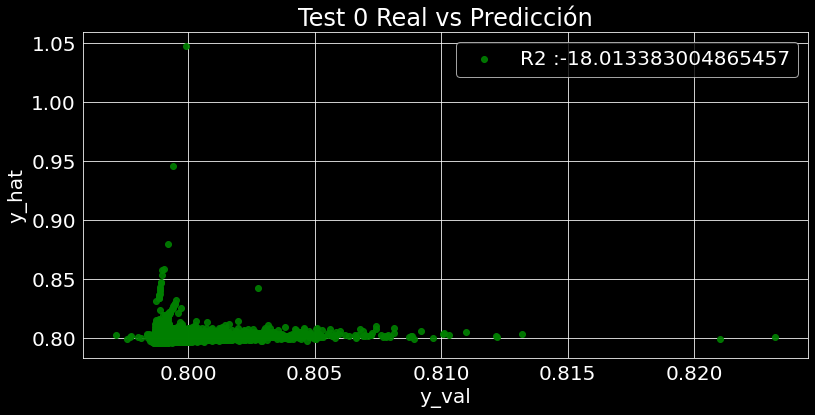

In [79]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [80]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.800136
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.797410
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.800089
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.797353
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.800285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.798648
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.802699
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.800469
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.800296


In [81]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.151328
1         16.096303
2         16.150395
3         16.095155
4         16.154341
            ...    
281661    16.121294
281662    16.203081
281663    16.158056
281664    16.154577
281665    16.116070
Name: 16, Length: 281666, dtype: float64

In [82]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.151328
1,12598#201902,16.096303
2,23697#201902,16.150395
3,23768#201902,16.095155
4,7174#201902,16.154341
...,...,...
281661,8596193#202011,16.121294
281662,8616083#202011,16.203081
281663,8670207#202011,16.158056
281664,8677655#202011,16.154577


In [83]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     7.609670e+05
std      2.852373e+06
min      1.333576e+05
25%      4.892002e+05
50%      6.980390e+05
75%      9.206500e+05
max      1.490384e+09
Name: gasto_familiar, dtype: float64

In [84]:
n = 40
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN40.csv'

In [85]:
np.mean(sub['gasto_familiar'])

760967.0305575087

In [86]:
sub.to_csv(sub_name, index=False)

# Test 1

In [87]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

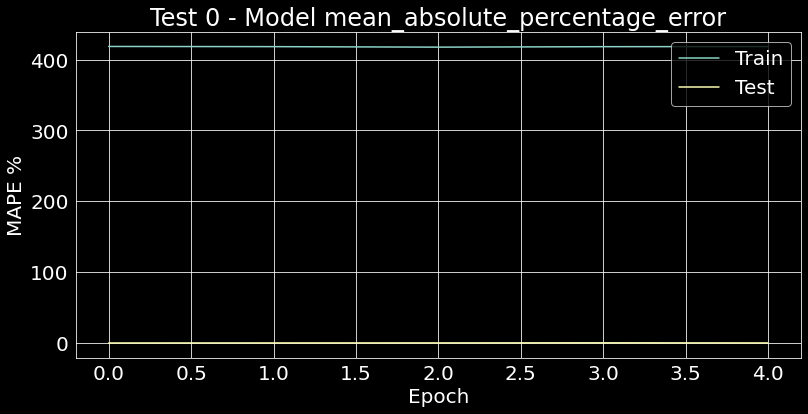

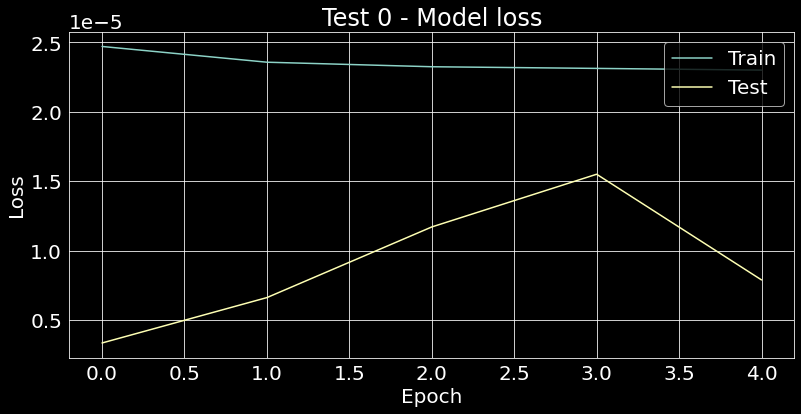

In [88]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 0 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 0 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [89]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 730us/step - loss: 2.4716e-05 - mean_absolute_percentage_error: 0.3375
loss :  2.4715522158658132e-05
mean_absolute_percentage_error :  0.3374665379524231


# Submission

In [90]:
y_hat = model.predict(x_val)
y_hat

array([[0.79976654],
       [0.7966599 ],
       [0.7996483 ],
       ...,
       [0.8008566 ],
       [0.80107737],
       [0.7985177 ]], dtype=float32)

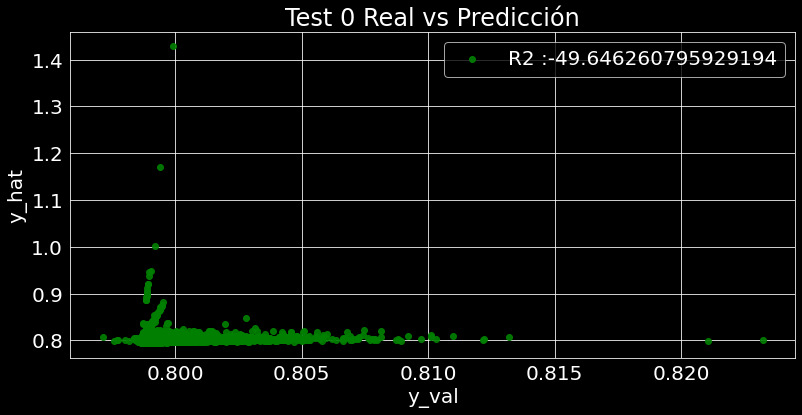

In [91]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [92]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.799767
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.796660
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.799648
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.796846
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.799871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.797688
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.803609
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.800857
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.801077


In [93]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.143880
1         16.081169
2         16.141492
3         16.084926
4         16.145983
            ...    
281661    16.101930
281662    16.221440
281663    16.165883
281664    16.170340
281665    16.118671
Name: 16, Length: 281666, dtype: float64

In [94]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.143880
1,12598#201902,16.081169
2,23697#201902,16.141492
3,23768#201902,16.084926
4,7174#201902,16.145983
...,...,...
281661,8596193#202011,16.101930
281662,8616083#202011,16.221440
281663,8670207#202011,16.165883
281664,8677655#202011,16.170340


In [98]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     1.246984e+07
std      6.223344e+09
min     -6.692215e+04
25%      3.482149e+05
50%      5.813912e+05
75%      8.599479e+05
max      3.302816e+12
Name: gasto_familiar, dtype: float64

In [95]:
n = 41
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN41.csv'

In [96]:
np.mean(sub['gasto_familiar'])

16.11429484979268

In [97]:
sub.to_csv(sub_name, index=False)

# Test 2

In [99]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


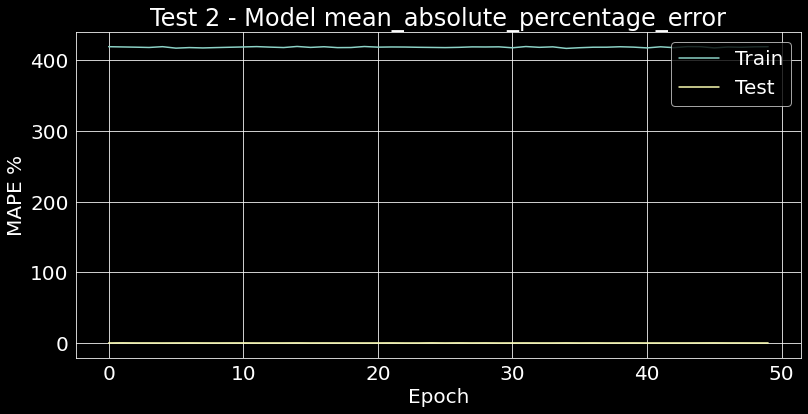

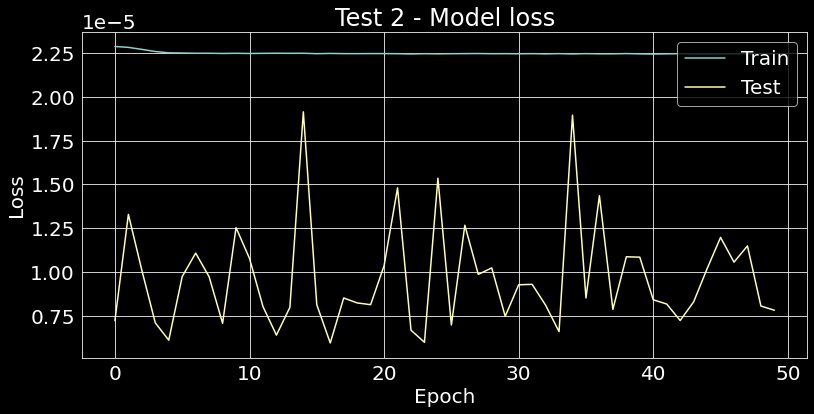

In [100]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [101]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 732us/step - loss: 2.1943e-05 - mean_absolute_percentage_error: 0.3501
loss :  2.1942751118331216e-05
mean_absolute_percentage_error :  0.35008513927459717


# Submission

In [102]:
y_hat = model.predict(x_val)
y_hat

array([[0.8005689 ],
       [0.7981237 ],
       [0.80051225],
       ...,
       [0.801688  ],
       [0.80172527],
       [0.7996387 ]], dtype=float32)

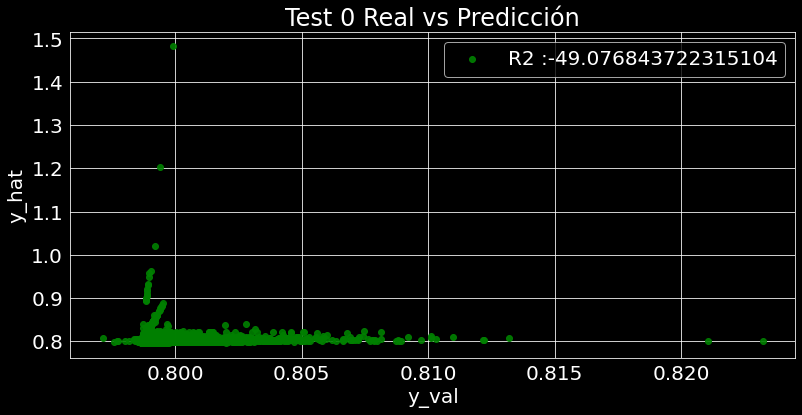

In [103]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [104]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.800569
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.798124
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.800512
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.798316
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.800662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.798881
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.804180
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.801688
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.801725


In [105]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.160075
1         16.110718
2         16.158932
3         16.114596
4         16.161955
            ...    
281661    16.126010
281662    16.232973
281663    16.182666
281664    16.183418
281665    16.141299
Name: 16, Length: 281666, dtype: float64

In [106]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.160075
1,12598#201902,16.110718
2,23697#201902,16.158932
3,23768#201902,16.114596
4,7174#201902,16.161955
...,...,...
281661,8596193#202011,16.126010
281662,8616083#202011,16.232973
281663,8670207#202011,16.182666
281664,8677655#202011,16.183418


In [107]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     3.559170e+07
std      1.833376e+10
min      2.823772e+05
25%      6.334348e+05
50%      8.244228e+05
75%      1.064596e+06
max      9.730068e+12
Name: gasto_familiar, dtype: float64

In [108]:
n = 42
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN42.csv'

In [109]:
np.mean(sub['gasto_familiar'])

35591700.775038555

In [110]:
sub.to_csv(sub_name, index=False)

# Test 3

In [111]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


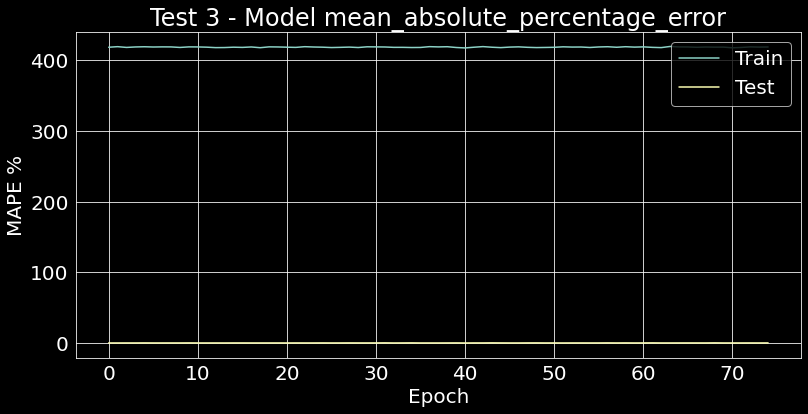

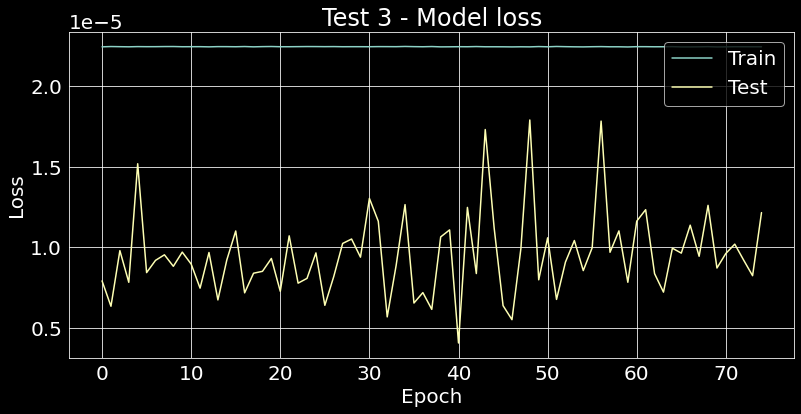

In [112]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [113]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

25740/25740 [==============================] - 19s 727us/step - loss: 2.2466e-05 - mean_absolute_percentage_error: 0.3806
loss :  2.2465606889454648e-05
mean_absolute_percentage_error :  0.3806360065937042


## Submission

In [114]:
y_hat = model.predict(x_val)
y_hat

array([[0.8013996 ],
       [0.79882026],
       [0.80133843],
       ...,
       [0.80280435],
       [0.80279195],
       [0.8004082 ]], dtype=float32)

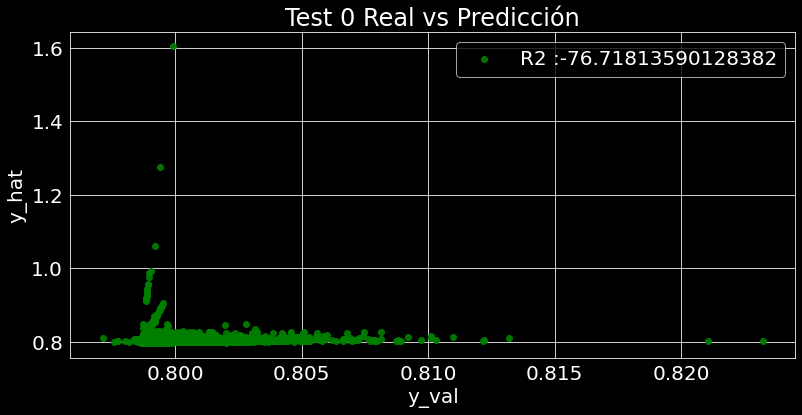

In [115]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [116]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.801400
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.798820
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.801338
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.798973
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.801604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.799686
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.805718
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.802804
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.802792


In [117]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.176844
1         16.124778
2         16.175609
3         16.127853
4         16.180971
            ...    
281661    16.142259
281662    16.264006
281663    16.205200
281664    16.204950
281665    16.156832
Name: 16, Length: 281666, dtype: float64

In [118]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.176844
1,12598#201902,16.124778
2,23697#201902,16.175609
3,23768#201902,16.127853
4,7174#201902,16.180971
...,...,...
281661,8596193#202011,16.142259
281662,8616083#202011,16.264006
281663,8670207#202011,16.205200
281664,8677655#202011,16.204950


In [119]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     4.112655e+08
std      2.173969e+11
min      3.686091e+05
25%      7.571112e+05
50%      9.821755e+05
75%      1.251308e+06
max      1.153773e+14
Name: gasto_familiar, dtype: float64

In [120]:
n = 43
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN43.csv'

In [121]:
np.mean(sub['gasto_familiar'])

411265475.58602595

In [122]:
sub.to_csv(sub_name, index=False)

# Test 4

In [123]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


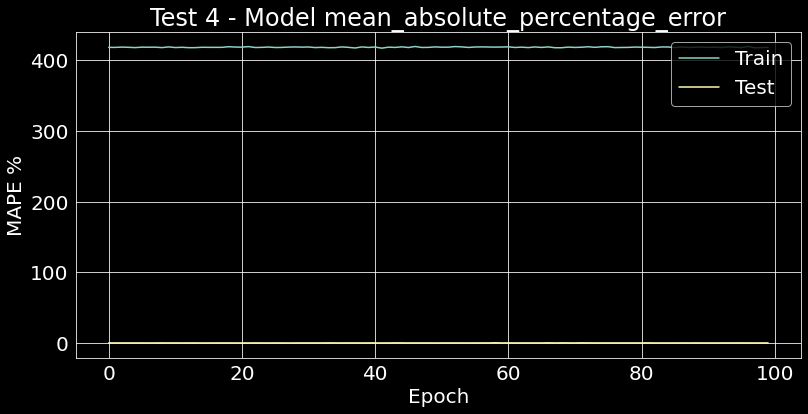

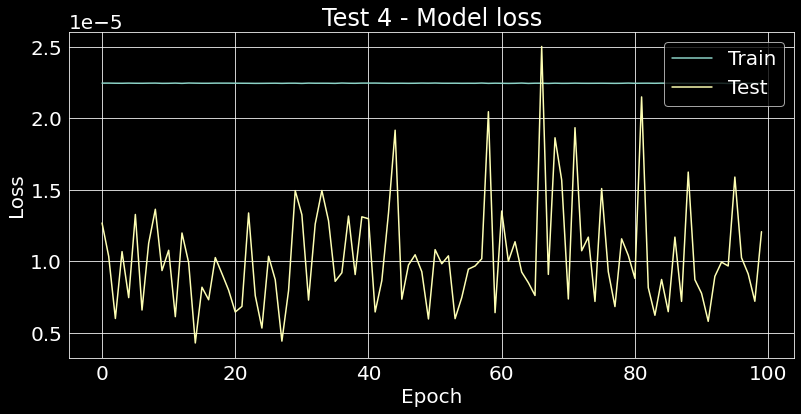

In [124]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [125]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 19s 729us/step - loss: 2.2023e-05 - mean_absolute_percentage_error: 0.3583
loss :  2.2023363271728158e-05
mean_absolute_percentage_error :  0.3582613170146942


## Submission

In [126]:
y_hat = model.predict(x_val)
y_hat

array([[0.80120295],
       [0.7985795 ],
       [0.80111796],
       ...,
       [0.8026899 ],
       [0.8027324 ],
       [0.80031556]], dtype=float32)

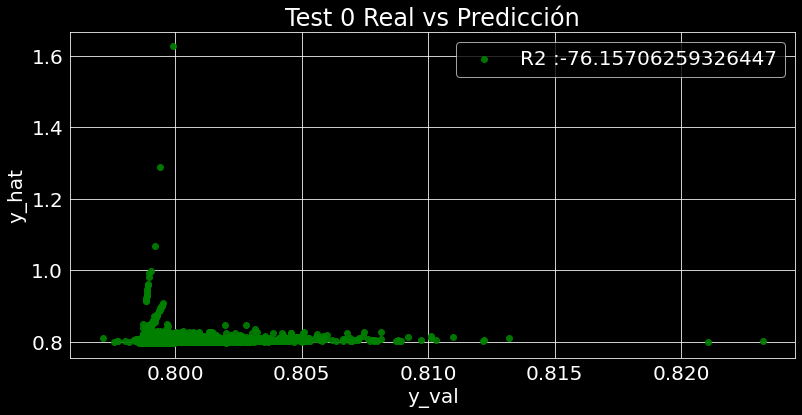

In [127]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [128]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.801203
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.798580
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.801118
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.798697
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.801475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.799513
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.805609
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.802690
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.802732


In [129]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.172875
1         16.119919
2         16.171159
3         16.122294
4         16.178363
            ...    
281661    16.138759
281662    16.261810
281663    16.202890
281664    16.203748
281665    16.154962
Name: 16, Length: 281666, dtype: float64

In [130]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.172875
1,12598#201902,16.119919
2,23697#201902,16.171159
3,23768#201902,16.122294
4,7174#201902,16.178363
...,...,...
281661,8596193#202011,16.138759
281662,8616083#202011,16.261810
281663,8670207#202011,16.202890
281664,8677655#202011,16.203748


In [131]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     6.383848e+08
std      3.378696e+11
min      3.401852e+05
25%      7.163041e+05
50%      9.422265e+05
75%      1.211265e+06
max      1.793148e+14
Name: gasto_familiar, dtype: float64

In [132]:
n = 44
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN44.csv'

In [133]:
np.mean(sub['gasto_familiar'])

638384842.2863604

In [134]:
sub.to_csv(sub_name, index=False)

# Test 5

In [135]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



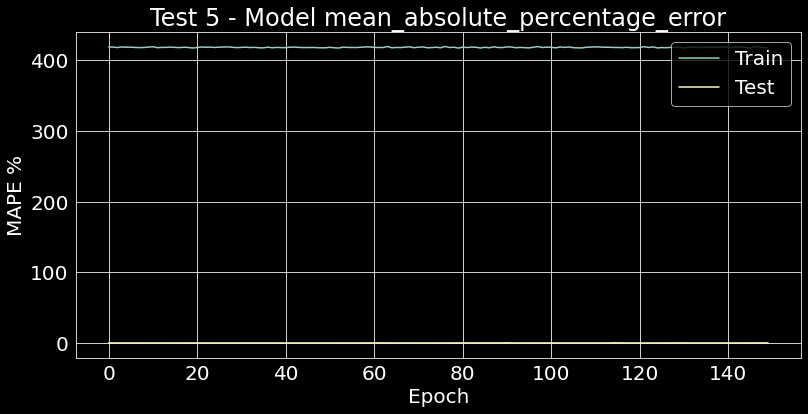

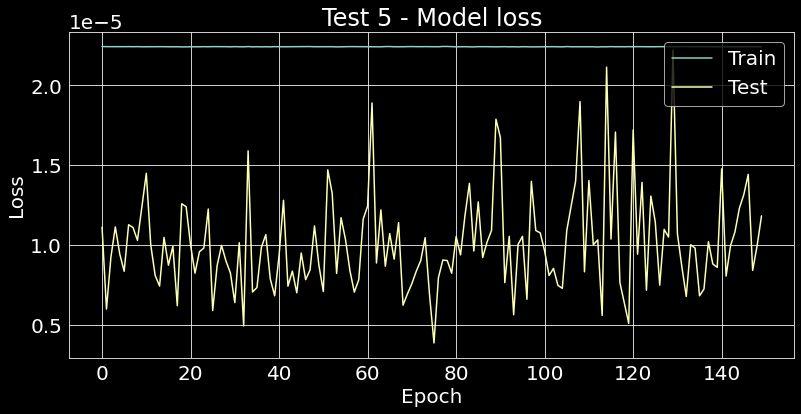

In [136]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [137]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 18s 712us/step - loss: 2.2821e-05 - mean_absolute_percentage_error: 0.3244
loss :  2.2821410311735235e-05
mean_absolute_percentage_error :  0.3243548274040222


# Submission

In [138]:
y_hat = model.predict(x_val)
y_hat

array([[0.79959244],
       [0.7967987 ],
       [0.79953915],
       ...,
       [0.80097914],
       [0.8011814 ],
       [0.7986491 ]], dtype=float32)

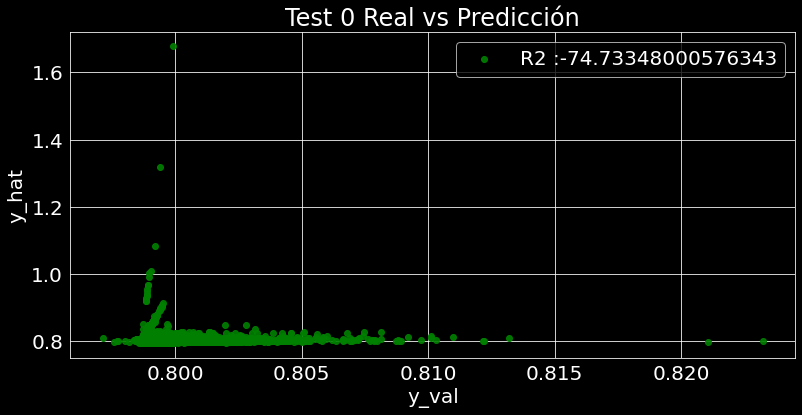

In [139]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [140]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.799592
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.796799
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.799539
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.796989
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.799884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.797851
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.804107
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.800979
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.801181


In [141]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         16.140365
1         16.083972
2         16.139289
3         16.087815
4         16.146245
            ...    
281661    16.105216
281662    16.231488
281663    16.168357
281664    16.172439
281665    16.121323
Name: 16, Length: 281666, dtype: float64

In [142]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,16.140365
1,12598#201902,16.083972
2,23697#201902,16.139289
3,23768#201902,16.087815
4,7174#201902,16.146245
...,...,...
281661,8596193#202011,16.105216
281662,8616083#202011,16.231488
281663,8670207#202011,16.168357
281664,8677655#202011,16.172439


In [143]:
sub['gasto_familiar'] = np.e**(sub['gasto_familiar'])+minimo
sub['gasto_familiar'].describe()

count    2.816660e+05
mean     1.776408e+09
std      9.417192e+11
min      7.931515e+03
25%      3.827534e+05
50%      6.022307e+05
75%      8.722314e+05
max      4.997911e+14
Name: gasto_familiar, dtype: float64

In [144]:
n = 45
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN45.csv'

In [145]:
np.mean(sub['gasto_familiar'])

1776408328.082892

In [146]:
sub.to_csv(sub_name, index=False)